# Can a single feature tell us what species of Iris flower we're looking at?

This project aims to find out if a single feature from the Iris dataset can be used to accurately classify flower species.

We'll test each of the four features - sepal length, sepal width, petal length, and petal width.
By building a simple model for each one, we'll see which feature is the most effective at predicting the flower's species. 

### 1. Import packages and libraries

We import libraries like 

* pandas for data handling
* seaborn/matplotlib for visualization
* scikit-learn for ML

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

### 2. Load the Dataset

First, we will load the Iris dataset from csv file into a pandas DataFrame.

In [2]:
# Load dataset into dataframe
df=pd.read_csv('iris_dataset.csv')

In [3]:
# View top 5 rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Explore the dataset

Identify the number of rows and columns in the dataset

In [4]:
df.shape

(150, 6)

Next, we get basic information about the dataset, including the data type of values in each column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### What we understood:
* The total number of rows is 150 and there are 6 columns.
* There are no null values  or missing values in the dataset 


### 4. Data Preprocessing

Drop the 'Id' column as it is not a feature.

In [6]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Renaming columns for improved readability and clarity.

In [7]:
df.columns = ['Sepal_Length(cm)','Sepal_Width(cm)','Petal_Length(cm)','Petal_Width(cm)','Species']

Separate the features into X and the target (species) into y

In [8]:
X = df.drop('Species', axis=1)
y = df['Species']

### 5. Exploratory Data Analysis

Isolating features - creates a list of column names that represent our features.

In [9]:
features = X.columns.to_list()

#### Histogram

For each feature, we'll create a histogram that shows how the measurements are distributed for each species.

We'll be looking for a feature where the species' data is clearly separated with minimal overlap. 

Generating Histograms for each feature, colored by species...


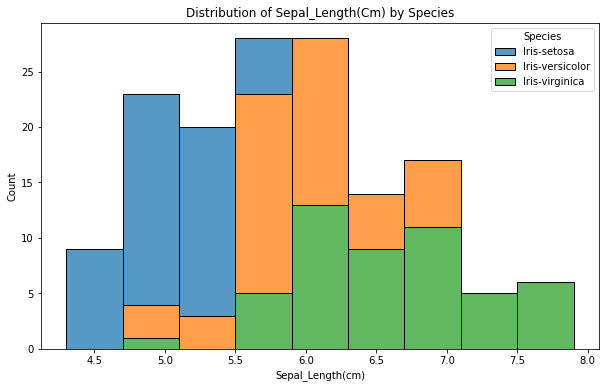

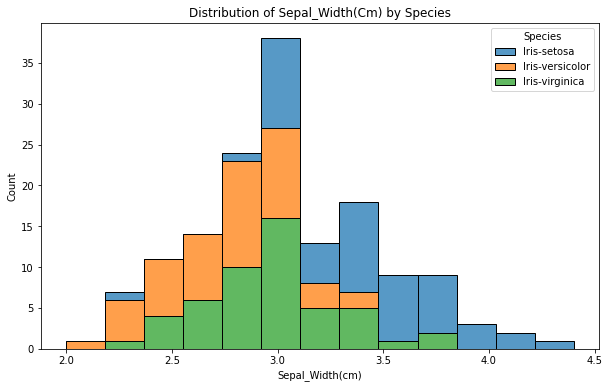

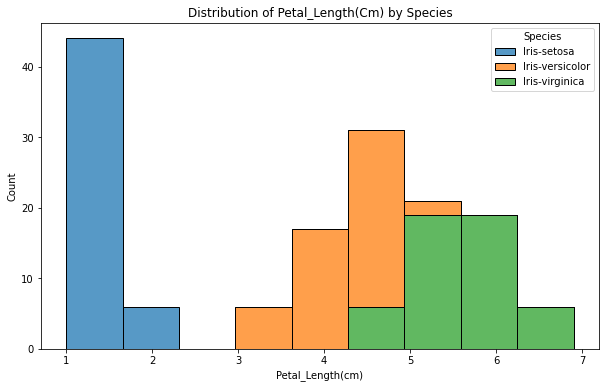

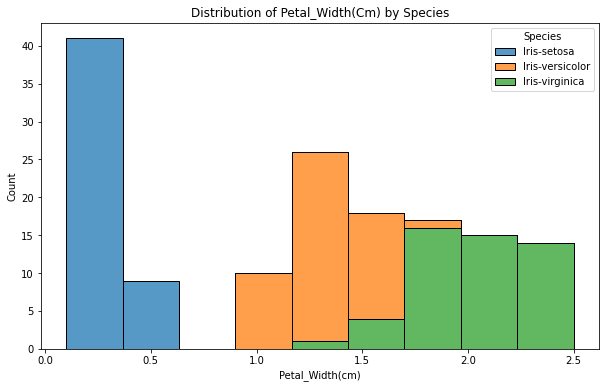

In [10]:
print("Generating Histograms for each feature, colored by species...")
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue="Species", multiple="stack", palette="tab10")
    plt.title(f'Distribution of {feature.title()} by Species')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

The histograms show that Petal Length and Petal Width have distinct, non-overlapping distributions for the different species. Sepal measurements, however, have significant overlap.

This suggests that petal features are better at separating the species.

#### Box plot 

For each feature, we'll create a boxplot that shows how the measurements are distributed for each species.

Generating Box Plots for each feature, grouped by species...


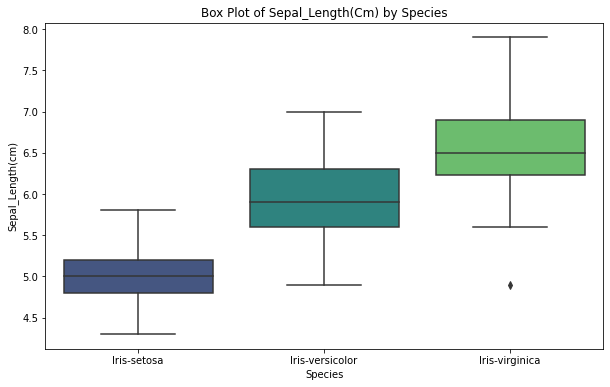

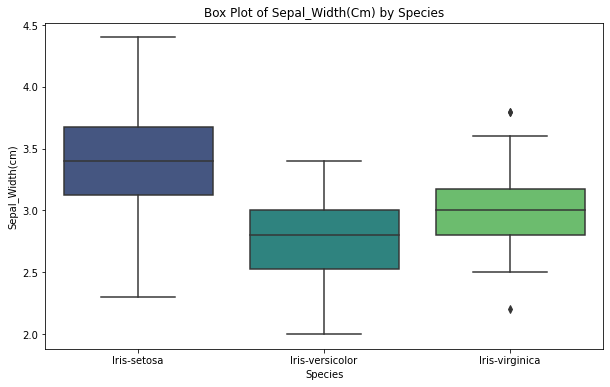

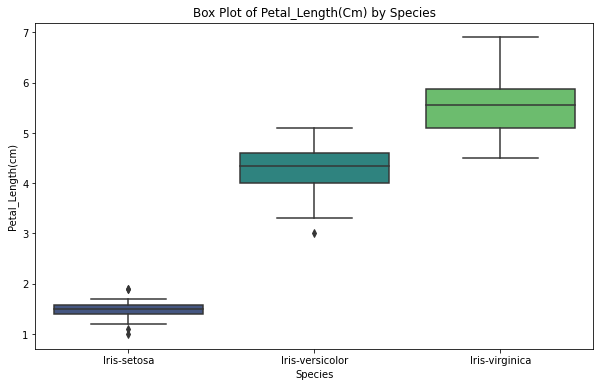

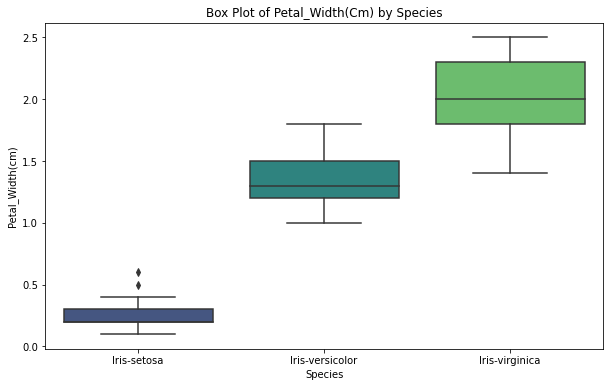

In [11]:
print("Generating Box Plots for each feature, grouped by species...")
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="Species", y=feature, palette="viridis")
    plt.title(f'Box Plot of {feature.title()} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.show()

The box plots confirm the histogram findings.

The boxes for Petal Length and Petal Width are well-separated with almost no overlap between species. In contrast, the box plots for the sepal measurements are heavily overlapping, indicating these features are poor individual predictors.

#### What we understood:
Petal Length  and Petal Width  are the most effective features for classifying Iris species.
The plots involving these features show the least amount of overlap between species and the most distinct separation, particularly for the Iris setosa species. 

### 6.Train and Evaluate a Model

For each single feature, we'll train a Logistic regression model to classify the species. 

We'll then evaluate the model's performance by calculating its accuracy, which will give us a numerical score to compare each feature's effectiveness.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) 

In [13]:
feature_accuracies = {}
print("\nTraining and Evaluating Model for Each Single Feature")
for feature in features:
    
    # Isolate the current feature for training and testing
    X_train_single = X_train[[feature]]
    X_test_single = X_test[[feature]]
    
    # Create and train the Logistic Regression model
    model = LogisticRegression(max_iter=200, random_state=42)
    model.fit(X_train_single, y_train)
    
    # Use the trained model to make predictions on the test data
    y_pred = model.predict(X_test_single)
    
    # Calculate the accuracy score and store it
    accuracy = accuracy_score(y_test, y_pred)
    feature_accuracies[feature] = accuracy
    
    print(f"Accuracy for {feature} : {accuracy:.4f}")
    


Training and Evaluating Model for Each Single Feature
Accuracy for Sepal_Length(cm) : 0.6579
Accuracy for Sepal_Width(cm) : 0.6053
Accuracy for Petal_Length(cm) : 0.9211
Accuracy for Petal_Width(cm) : 0.9474


### 7. Results 

 Now we'll look at all the results together to find the best-performing feature.


 Results: 
            Feature  Accuracy
3   Petal_Width(cm)  0.947368
2  Petal_Length(cm)  0.921053
0  Sepal_Length(cm)  0.657895
1   Sepal_Width(cm)  0.605263


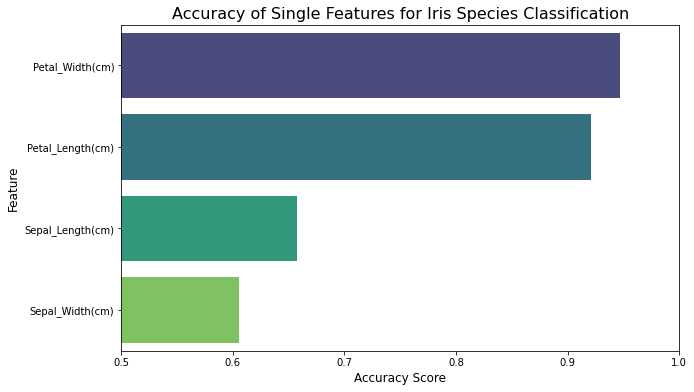

In [14]:
# Convert our dictionary of results into a clean table
results_df = pd.DataFrame({'Feature': feature_accuracies.keys(), 'Accuracy': feature_accuracies.values()}).sort_values(by='Accuracy', ascending=False)

print("\n Results: ")
print(results_df)

# Let's visualize the results with a bar plot to make the comparison easy to see.
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Feature', data=results_df, palette='viridis')
plt.title('Accuracy of Single Features for Iris Species Classification', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xlim(0.5, 1.0) 
plt.show()

### 8. Conclusion

In [15]:
best_feature = results_df.iloc[0]['Feature']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"'{best_feature}' is the most effective single feature for classifying Iris species, achieving an accuracy of {best_accuracy:.2%}.")

'Petal_Width(cm)' is the most effective single feature for classifying Iris species, achieving an accuracy of 94.74%.


#### The analysis confirms that a single feature can effectively classify Iris flower species.
Based on our model training and evaluation, the most effective feature was Petal Width, which achieved a classification accuracy of 94%.

### 9. What's Next?

* Try different simple models, like a Decision Tree, to see if the results are consistent.
* Explore the predictive power of feature combinations (eg: Petal Length + Petal Width)